### Importing important lib

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tabulate import tabulate

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression

### Loading data

In [2]:
df=pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


#### Shape of dataframe

In [3]:
df.shape

(3000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


#### Data type of dataframe

In [5]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

#### Imortant information of data

In [6]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


#### Finding null value in data

In [7]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

#### There are zero null values present in our data

### $$Separating\ Categorical\ and\ Numerical\ columns$$

In [8]:
num =df.select_dtypes(exclude='object') # to get only numeric data
num.head(2)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,1,339,6,5,4,6,0,76,2,79,6,3481
1,2,358,5,4,3,4,71,96,3,72,4,3510


In [9]:
cat =df.select_dtypes(include='object') # to get only categorical data
cat.head(2)

,roof,Grade
0,NO,D
1,YES,D


In [10]:
num_list=list(num.columns)
cat_list=list(cat.columns)
# to convert our data in tabular form
table = [cat_list,num_list]

print(tabulate({"Categorical":cat_list,
               "continuous":num_list},headers=['Categorical','continuous']))

Categorical    continuous
-------------  --------------
roof           Id
Grade          Area(total)
               Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price


## Visualizing various column

- Houses divided in various grade

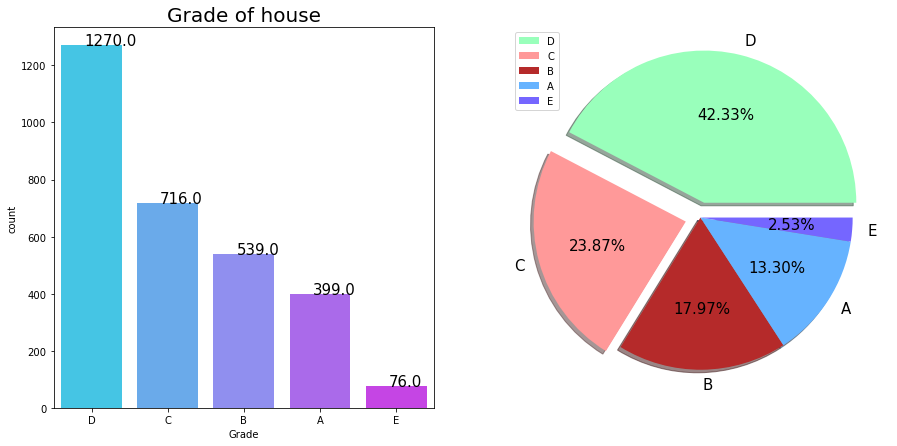

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Grade of house",size=20)              
percentage = df["Grade"].value_counts()         
labels = list(df["Grade"].value_counts().index) 
colors = ['#99ffbb','#ff9999','#b52a2a','#66b3ff','#7566ff']
ab=sb.countplot(x = df["Grade"], ax = ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0.1,0,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 15})
plt.legend()
plt.savefig("housegrade.png", format="png")
plt.show()

##### Here we can observe that most of the property belong to grade D which is 42.33% of total property

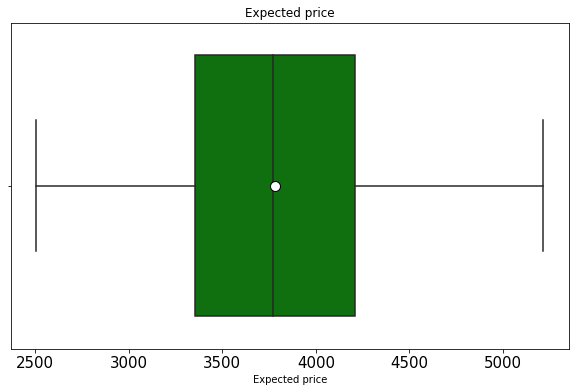

In [12]:
plt.figure(figsize = (10, 6))
sb.boxplot(df['Expected price'],color='green',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Expected price')
plt.xticks(fontsize = 15)
plt.savefig("propertypricing.png", format="png")

#### Here we can observe that most of the house expected price lies between 3250 to 4250

### Which grade house you want  and area size ?

In [13]:
df_a=df[df['Grade']=='A']
df_b=df[df['Grade']=='B']
df_c=df[df['Grade']=='C']
df_d=df[df['Grade']=='D']
df_e=df[df['Grade']=='E']

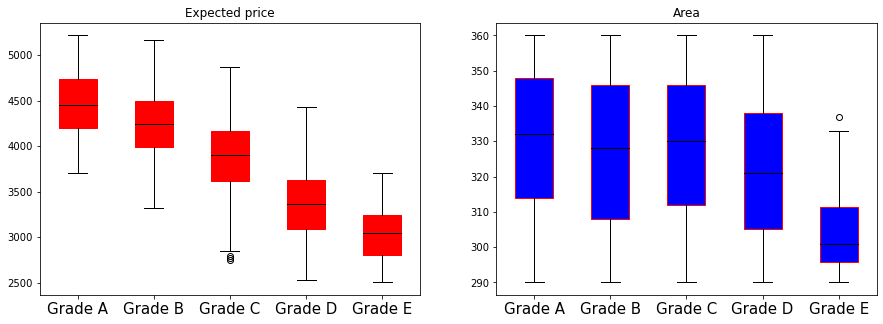

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
data=[df_a['Expected price'],df_b['Expected price'],df_c['Expected price'],df_d['Expected price'],df_e['Expected price']]
plt.boxplot(data,patch_artist=True,boxprops=dict(facecolor='red', color='red'),medianprops=dict(color='black'))
plt.xticks([1, 2,3,4,5], ['Grade A', 'Grade B','Grade C', 'Grade D','Grade E'],fontsize = 15)
plt.title('Expected price')
plt.subplot(122)
data=[df_a['Area(total)'],df_b['Area(total)'],df_c['Area(total)'],df_d['Area(total)'],df_e['Area(total)']]
plt.boxplot(data,patch_artist=True,boxprops=dict(facecolor='blue', color='red'),medianprops=dict(color='black'))
plt.xticks([1, 2,3,4,5], ['Grade A', 'Grade B','Grade C', 'Grade D','Grade E'],fontsize = 15)
plt.title('Area')
plt.show()
plt.savefig("grade_price.png", format="png")

#### Here we can observe that as the Grade of house is increasing the price is also increasing, highest price belong to Grade A house which is between 3750 to 5500 and lowest price for Grade E which ranges between 2500 to 3500

## Grade A

### Roof required or not

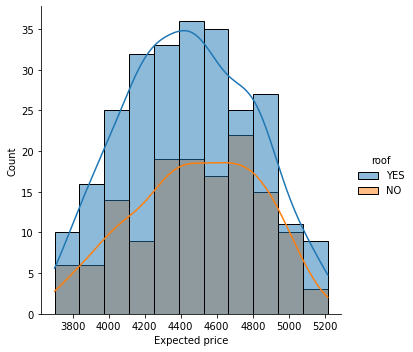

In [66]:
sb.displot(data=df_a, x="Expected price",hue='roof', kde=True);
plt.savefig("roof.png", format="png")

#### Here in Grade A the count of flat with roof having high price and the flat with no roof having low price

### $$With\ roof\ no.\ of\ bed\ room\ available$$

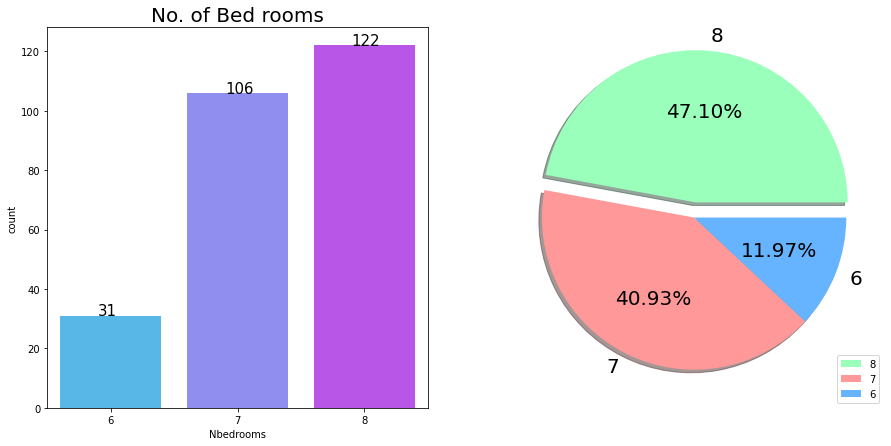

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_a[df_a['roof']=='YES']['Nbedrooms'].value_counts()         
labels = list(df_a[df_a['roof']=='YES']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_a[df_a['roof']=='YES']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 20})
plt.legend()
plt.savefig("with_roof.png", format="png")

- With roof 8 no. of bed room are mostly available in grade A which is 47.10% 

### $$Without\ roof\ no.\ of\ bed\ room\ available$$

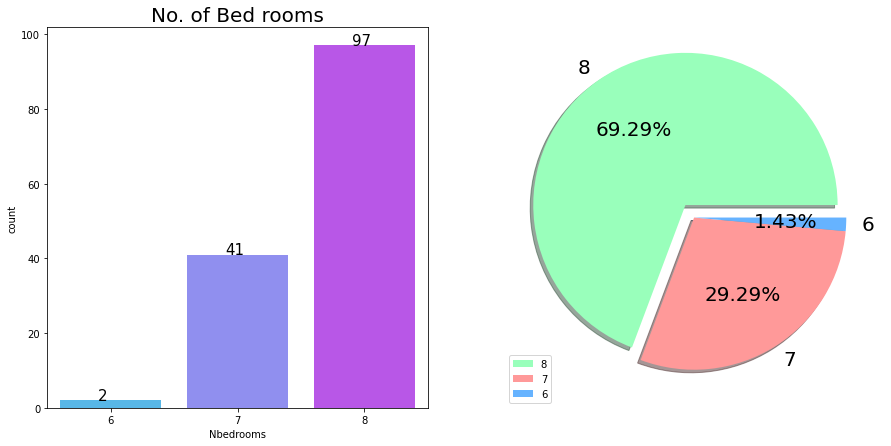

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_a[df_a['roof']=='NO']['Nbedrooms'].value_counts()         
labels = list(df_a[df_a['roof']=='NO']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_a[df_a['roof']=='NO']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 20})
plt.legend()
plt.savefig("without_roof.png", format="png")

- Without roof 8 no. of bed room are mostly available in grade A which is 69.29% 

#### For each number of bed room number of washroom available

In [18]:
df_1 = df_a[df_a['roof']=='YES'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df_1=pd.DataFrame(df_1)
df_1.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

df1 = df_a[df_a['roof']=='NO'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df1=pd.DataFrame(df1)
df1.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

In [19]:
print(df_1) # with roof
print(df1) # without roof

                       Nbwashrooms1
Nbedrooms Nbwashrooms              
6         5                      12
          6                      19
7         6                      36
          7                      70
8         7                      56
          8                      66
                       Nbwashrooms1
Nbedrooms Nbwashrooms              
6         6                       2
7         6                      12
          7                      29
8         7                      47
          8                      50


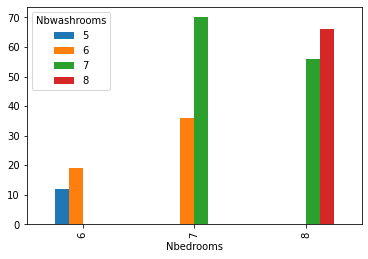

In [85]:
df_a[df_a['roof']=='YES'].groupby(['Nbwashrooms','Nbedrooms']).Nbwashrooms.count().unstack(0).plot.bar()
plt.savefig("with_wash.png", format="png")

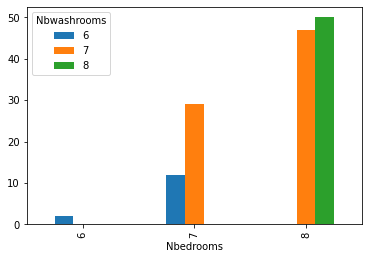

In [86]:
df_a[df_a['roof']=='NO'].groupby(['Nbwashrooms','Nbedrooms']).Nbwashrooms.count().unstack(0).plot.bar()
plt.savefig("withput_wash.png", format="png")

## Grade B

### Roof required or not

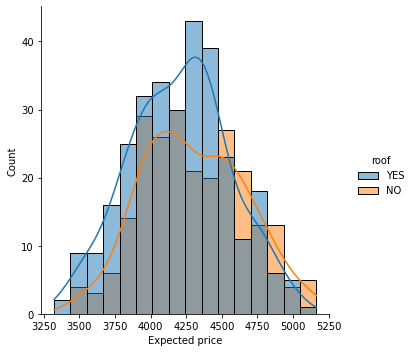

In [21]:
sb.displot(data=df_b, x="Expected price",hue='roof', kde=True);

#### Here in Grade B the count of flat with roof having high price and the flat with no roof having low price

### $$With\ roof\ no.\ of\ bed\ room\ available$$

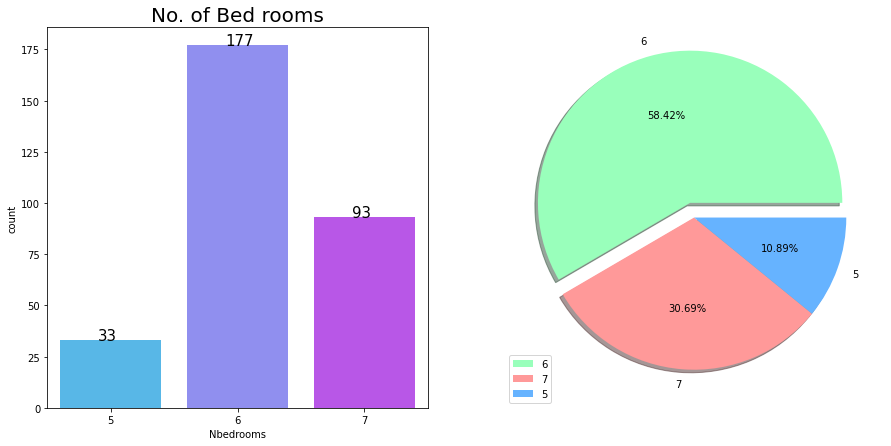

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_b[df_b['roof']=='YES']['Nbedrooms'].value_counts()         
labels = list(df_b[df_b['roof']=='YES']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_b[df_b['roof']=='YES']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

### $$Without\ roof\ no.\ of\ bed\ room\ available$$

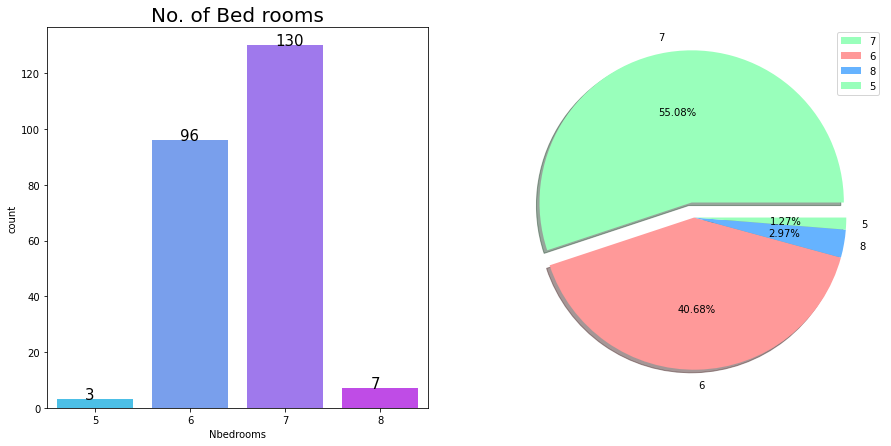

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_b[df_b['roof']=='NO']['Nbedrooms'].value_counts()         
labels = list(df_b[df_b['roof']=='NO']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_b[df_b['roof']=='NO']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

- Without roof 8 no. of bed room are mostly available in grade A which is 69.29% 

### For each number of bed room number of washroom available

In [24]:
df_2 = df_b[df_b['roof']=='YES'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df_2=pd.DataFrame(df_2)
df_2.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

df2 = df_b[df_b['roof']=='NO'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df2=pd.DataFrame(df2)
df2.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

In [25]:
print(df_2) # with roof
print(df2) # without roof

                       Nbwashrooms1
Nbedrooms Nbwashrooms              
5         4                      11
          5                      22
6         5                      89
          6                      88
7         6                      54
          7                      39
                       Nbwashrooms1
Nbedrooms Nbwashrooms              
5         5                       3
6         5                      46
          6                      50
7         6                      68
          7                      62
8         7                       7


<AxesSubplot:xlabel='No_bedroom'>

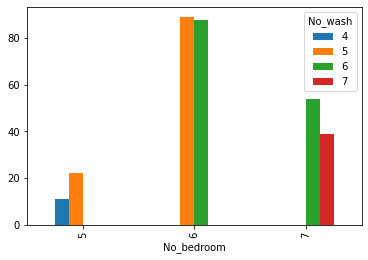

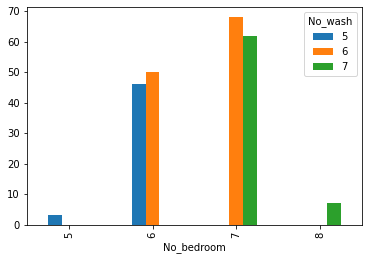

In [26]:

df_b1 = pd.DataFrame([[5,4,11],[5,5,22],[6,5,89],[6,6,88],[7,6,54],[7,7,39]]
                   ,columns=['No_bedroom','No_wash','val'])

df_b2 = pd.DataFrame([[5,5,3],[6,5,46],[6,6,50],[7,6,68],[7,7,62],[8,7,7]],
                      columns=['No_bedroom','No_wash','val'])

df_b1.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')
df_b2.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')

## Grade C

### Roof required or not

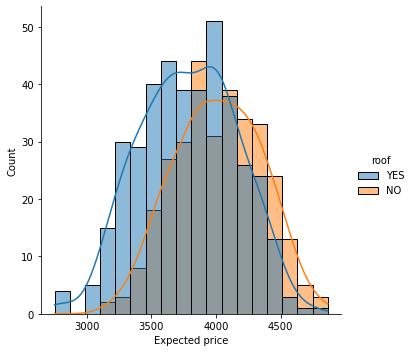

In [27]:
sb.displot(data=df_c, x="Expected price",hue='roof', kde=True);

#### Here in Grade c the count of flat with roof having high price and the flat with no roof having low price

### $$With\ roof\ no.\ of\ bed\ room\ available$$

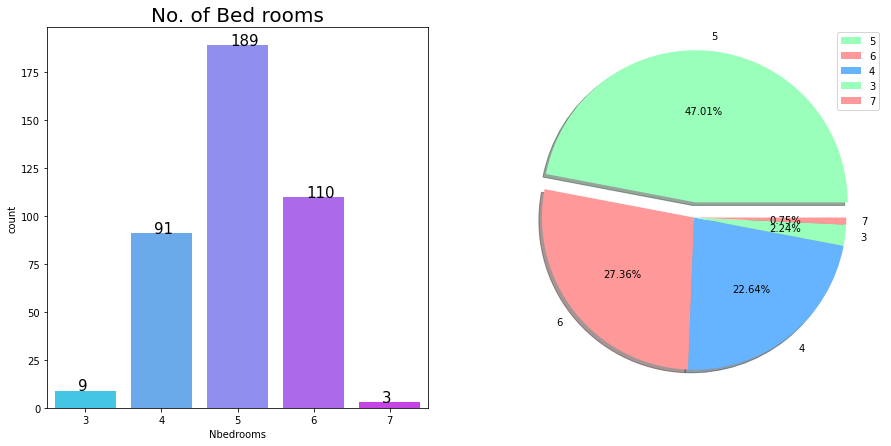

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_c[df_c['roof']=='YES']['Nbedrooms'].value_counts()         
labels = list(df_c[df_c['roof']=='YES']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_c[df_c['roof']=='YES']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

### $$Without\ roof\ no.\ of\ bed\ room\ available$$

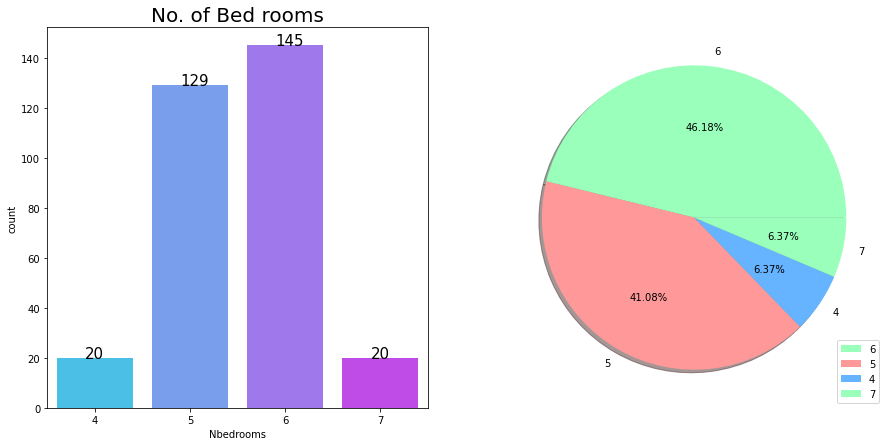

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_c[df_c['roof']=='NO']['Nbedrooms'].value_counts()         
labels = list(df_c[df_c['roof']=='NO']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_c[df_c['roof']=='NO']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

- Without roof 8 no. of bed room are mostly available in grade A which is 69.29% 

### For each number of bed room number of washroom available

In [30]:
df_3 = df_c[df_c['roof']=='YES'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df_3=pd.DataFrame(df_3)
df_3.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

df3 = df_c[df_c['roof']=='NO'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df3=pd.DataFrame(df3)
df3.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

In [31]:
print(df_3) # with roof
print(df3) # without roof

                       Nbwashrooms1
Nbedrooms Nbwashrooms              
3         2                       6
          3                       3
4         3                      39
          4                      52
5         4                      90
          5                      99
6         5                      63
          6                      47
7         6                       3
                       Nbwashrooms1
Nbedrooms Nbwashrooms              
4         3                       6
          4                      14
5         4                      67
          5                      62
6         5                      73
          6                      72
7         6                      20


<AxesSubplot:xlabel='No_bedroom'>

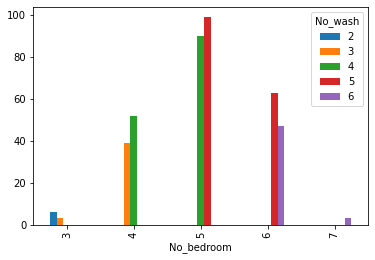

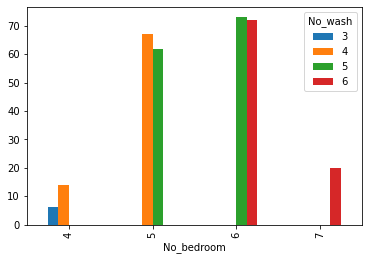

In [32]:
df_c1 = pd.DataFrame([[3,2,6],[3,3,3],[4,3,39],[4,4,52],[5,4,90],[5,5,99],[6,5,63],[6,6,47],
                   [7,6,3]],columns=['No_bedroom','No_wash','val'])

df_c2 = pd.DataFrame([[4,3,6],[4,4,14],[5,4,67],[5,5,62],[6,5,73],[6,6,72],[7,6,20]]
                   ,columns=['No_bedroom','No_wash','val'])

df_c1.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')
df_c2.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')

## Grade D

### Roof required or not

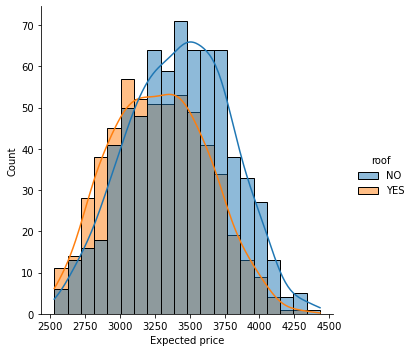

In [33]:
sb.displot(data=df_d, x="Expected price",hue='roof', kde=True);

#### Here in Grade D the count of flat with roof having high price and the flat with no roof having low price

### $$With\ roof\ no.\ of\ bed\ room\ available$$

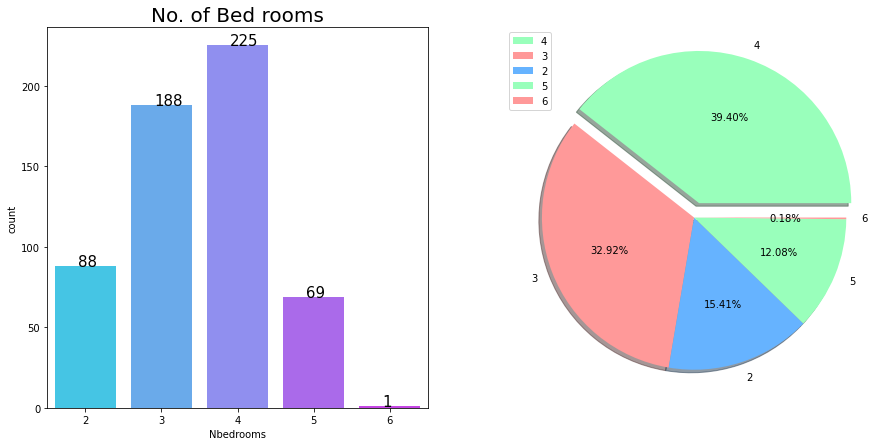

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_d[df_d['roof']=='YES']['Nbedrooms'].value_counts()         
labels = list(df_d[df_d['roof']=='YES']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_d[df_d['roof']=='YES']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

### $$Without\ roof\ no.\ of\ bed\ room\ available$$

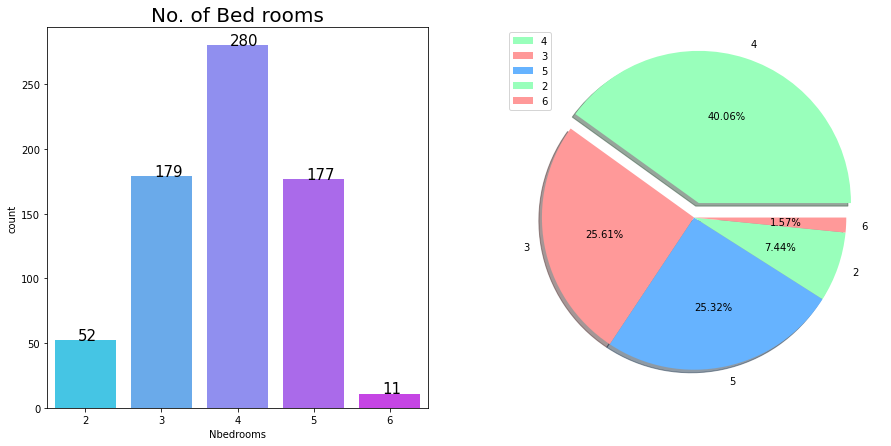

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_d[df_d['roof']=='NO']['Nbedrooms'].value_counts()         
labels = list(df_d[df_d['roof']=='NO']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_d[df_d['roof']=='NO']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

- Without roof 8 no. of bed room are mostly available in grade A which is 69.29% 

### For each number of bed room number of washroom available

In [36]:
df_4 = df_d[df_d['roof']=='YES'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df_4=pd.DataFrame(df_4)
df_4.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

df4 = df_d[df_d['roof']=='NO'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df4=pd.DataFrame(df4)
df4.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

In [37]:
print(df_4) # with roof
print(df4) # without roof

                       Nbwashrooms1
Nbedrooms Nbwashrooms              
2         1                      43
          2                      45
3         2                      92
          3                      96
4         3                     128
          4                      97
5         4                      41
          5                      28
6         5                       1
                       Nbwashrooms1
Nbedrooms Nbwashrooms              
2         1                      24
          2                      28
3         2                      78
          3                     101
4         3                     161
          4                     119
5         4                      98
          5                      79
6         5                       7
          6                       4


<AxesSubplot:xlabel='No_bedroom'>

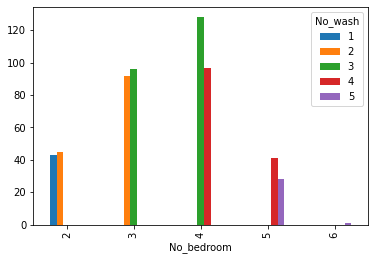

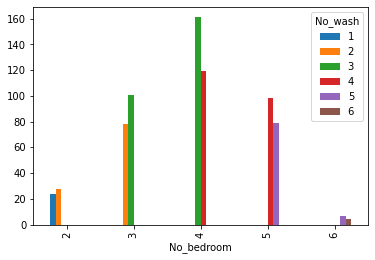

In [38]:
df_d1 = pd.DataFrame([[2,1,43],[2,2,45],[3,2,92],[3,3,96],[4,3,128],[4,4,97],[5,4,41],
                   [5,5,28],[6,5,1]],columns=['No_bedroom','No_wash','val'])

df_d2 = pd.DataFrame([[2,1,24],[2,2,28],[3,2,78],[3,3,101],[4,3,161],[4,4,119],[5,4,98],[5,5,79],
                   [6,5,7],[6,6,4]],columns=['No_bedroom','No_wash','val'])

df_d1.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')
df_d2.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')

## Grade E

### Roof required or not

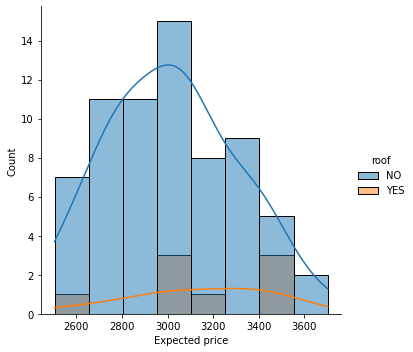

In [39]:
sb.displot(data=df_e, x="Expected price",hue='roof', kde=True);

#### Here in Grade E the count of flat with roof having high price and the flat with no roof having low price

### $$With\ roof\ no.\ of\ bed\ room\ available$$

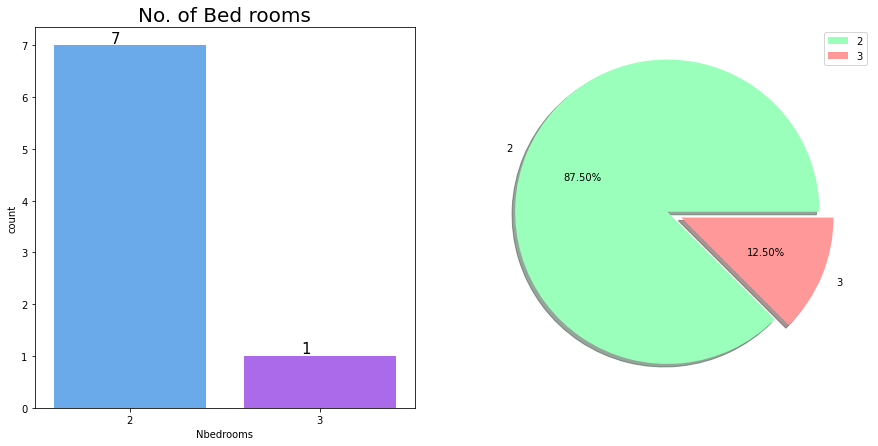

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_e[df_e['roof']=='YES']['Nbedrooms'].value_counts()         
labels = list(df_e[df_e['roof']=='YES']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_e[df_e['roof']=='YES']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

### $$Without\ roof\ no.\ of\ bed\ room\ available$$

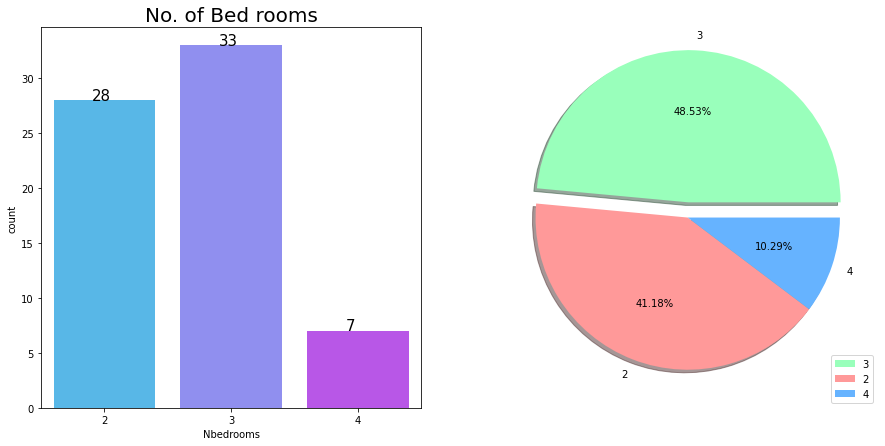

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("No. of Bed rooms",size=20)              
percentage = df_e[df_e['roof']=='NO']['Nbedrooms'].value_counts()         
labels = list(df_e[df_e['roof']=='NO']['Nbedrooms'].value_counts().index) 
colors = ['#99ffbb','#ff9999','#66b3ff']
ab=sb.countplot(x = df_e[df_e['roof']=='NO']['Nbedrooms'],ax=ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 10})
plt.legend()

- Without roof 8 no. of bed room are mostly available in grade A which is 69.29% 

### For each number of bed room number of washroom available

In [42]:
df_5 = df_e[df_e['roof']=='YES'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df_5=pd.DataFrame(df_5)
df_5.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

df5 = df_e[df_e['roof']=='NO'].groupby(['Nbedrooms','Nbwashrooms']).Nbwashrooms.count()
df5=pd.DataFrame(df5)
df5.rename(columns={'Nbwashrooms':'Nbwashrooms1'},inplace=True)

In [43]:
print(df_5) # with roof
print(df5) # without roof

                       Nbwashrooms1
Nbedrooms Nbwashrooms              
2         1                       4
          2                       3
3         2                       1
                       Nbwashrooms1
Nbedrooms Nbwashrooms              
2         1                      16
          2                      12
3         2                      23
          3                      10
4         3                       6
          4                       1


<AxesSubplot:xlabel='No_bedroom'>

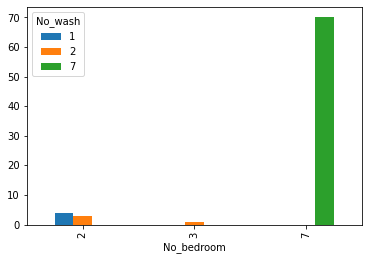

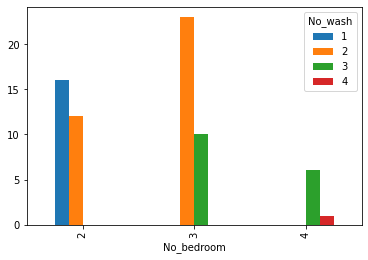

In [44]:
df_e1 = pd.DataFrame([[2,1,4],[2,2,3],[3,2,1],['7','7',70]],columns=['No_bedroom','No_wash','val'])

df_e2 = pd.DataFrame([[2,1,16],[2,2,12],[3,2,23],[3,3,10],
                   [4,3,6],[4,4,1]],columns=['No_bedroom','No_wash','val'])

df_e1.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')
df_e2.pivot("No_bedroom", "No_wash", "val").plot(kind='bar')

# MODEL BUILDING

In [45]:
df['roof']=df['roof'].astype('category')
df['Grade']=df['Grade'].astype('category')

In [46]:
label_encoder = preprocessing.LabelEncoder()
df['roof_encode']= label_encoder.fit_transform(df['roof'])
df['Grade_encode']= label_encoder.fit_transform(df['Grade'])

<AxesSubplot:>

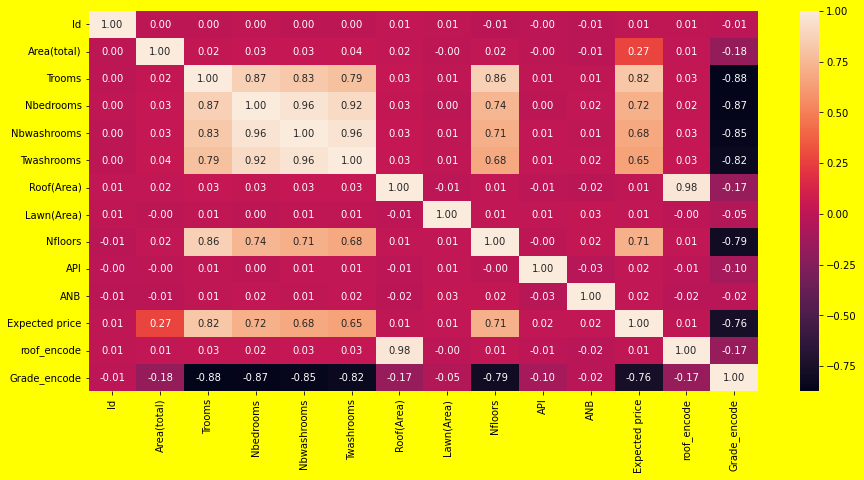

In [47]:
plt.figure(figsize=(15,7),facecolor='yellow')
df_corr=df.corr()
sb.heatmap(df_corr,annot=True,fmt='.2f')

In [48]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encode,Grade_encode
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3


In [49]:
x=df.drop(['Id','roof','Grade','Grade_encode'],axis=1)
y=df['Grade_encode']

### By using Feature Extraction

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  

In [51]:
lda=LinearDiscriminantAnalysis(n_components=2)
df_lda=lda.fit_transform(x,y)

In [52]:
df_lda

array([[ 1.74394465, -0.60621519],
       [ 2.05668296, -2.01089524],
       [-0.57468716, -0.51726967],
       ...,
       [ 0.72788438,  0.59549255],
       [-2.5099422 ,  2.4090131 ],
       [-1.76556618, -1.5693488 ]])

In [53]:
df_lda1=pd.DataFrame(df_lda,columns=['independent','dependent'])

In [54]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encode,Grade_encode
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B,1,1
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A,1,0
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D,0,3
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B,0,1


In [55]:
x= pd.DataFrame(df_lda1['independent'])
y= df['Grade_encode']

In [56]:
results, names = list(), list()

### Logistic Regression

In [57]:
logreg=LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=42)
n_scores_lr = cross_val_score(logreg, x, y, scoring='f1_weighted', cv=cv)
results.append(n_scores_lr)
names.append('Logistic Reg')
round(n_scores_lr.mean()*100,2)

92.52

### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=42)
n_scores_dt = cross_val_score(dct, x, y, scoring='f1_weighted', cv=cv)
results.append(n_scores_dt)
names.append('Decision Tree')
round(n_scores_dt.mean()*100,2)

89.75

### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=42)
n_scores_rf = cross_val_score(rfc, x, y, scoring='f1_weighted', cv=cv)
results.append(n_scores_rf)
names.append('Random forest')
round(n_scores_rf.mean()*100,2)

89.75

### AdaBoost Classifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=42)
n_scores_ada = cross_val_score(ada, x, y, scoring='f1_weighted', cv=cv)
results.append(n_scores_ada)
names.append('AdaBoost')
round(n_scores_ada.mean()*100,2)

82.06

### Stacking 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from numpy import mean

In [62]:
def model_stacking():
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('dtc', DecisionTreeClassifier()))
	level0.append(('ada', AdaBoostClassifier()))
	level1 = LogisticRegression()
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
	return model
model = model_stacking()

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=42)
n_scores_sta = cross_val_score(model, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores_sta)
names.append('Stacking')
print(round(mean(n_scores_sta)*100,2))

92.27


In [63]:
results

[array([0.92973648, 0.92329188, 0.92420519, 0.9236009 ]),
 array([0.88950354, 0.89515818, 0.90537415, 0.89978566]),
 array([0.88950354, 0.89515818, 0.90537415, 0.89978566]),
 array([0.74590261, 0.84481933, 0.8579891 , 0.83371838]),
 array([0.92466298, 0.92085196, 0.9255119 , 0.91965567])]

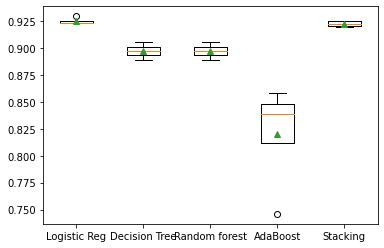

In [114]:
plt.boxplot(results, labels=names, showmeans=True)
plt.savefig('model_boxplot.jpg')
plt.show()


In [99]:
Result

,Model_name,F1
0,Logistic Reg,92.52
1,Decision Tree,89.75
2,Random forest,89.75
3,AdaBoost,82.06
4,Stacking,92.27


In [110]:
Error={'Model_name':names,
       'F1':[round(n_scores_lr.mean()*100,2),round(n_scores_dt.mean()*100,2),round(n_scores_rf.mean()*100,2),round(n_scores_ada.mean()*100,2),round(mean(n_scores_sta)*100,2)]}
Result=pd.DataFrame(Error)
aa= Result.sort_values(by=['F1'],ascending=False)
aa

,Model_name,F1
0,Logistic Reg,92.52
4,Stacking,92.27
1,Decision Tree,89.75
2,Random forest,89.75
3,AdaBoost,82.06


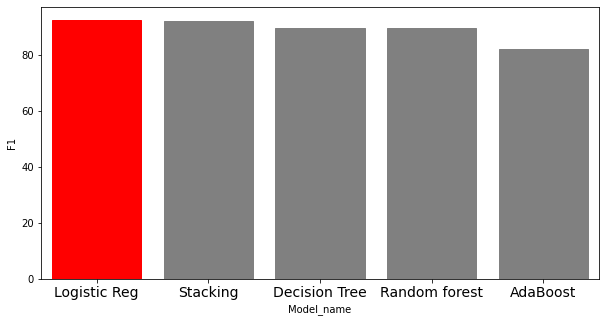

In [112]:
plt.figure(figsize=(10,5))
# plt.title('Best model',size=15)
ax=sb.barplot(data=aa,x='Model_name',y=Result['F1'])
ax.tick_params(axis='x', labelsize=14)
for bar in ax.patches:
    if bar.get_height() >92.28:
        bar.set_color('red')
    else:
        bar.set_color('grey')
plt.savefig('best_model.jpg')

### Logistic Regression shows best performance with 92.52 %